In [65]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

In [66]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (12.0, 6.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [67]:
def plot_img_and_hist(img, fig_title):
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title("Sample")
    
    r = np.mean(img[:, :, 0], axis=0)
    g = np.mean(img[:, :, 1], axis=0)
    b = np.mean(img[:, :, 2], axis=0)

    plt.subplot(1, 2, 2)
    plt.title("Color channel histogram")
    plt.plot(r, color="red")
    plt.plot(g, color="green")
    plt.plot(b, color="blue")
    plt.suptitle(fig_title, size=15)
    plt.show()
    

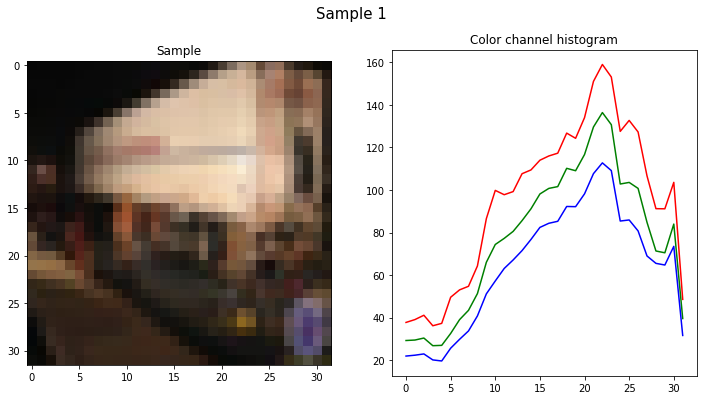

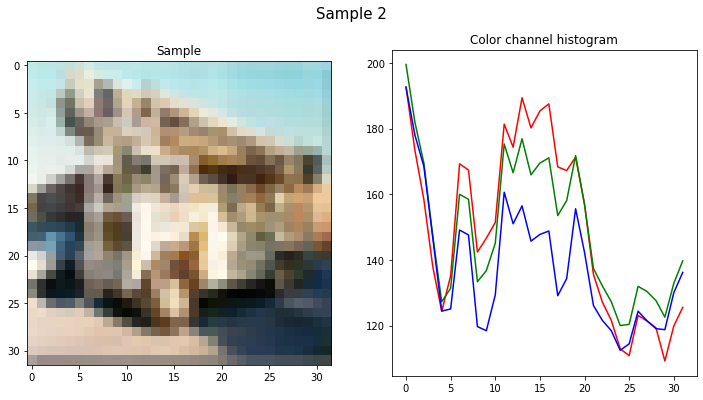

In [68]:
sample_img_1 = cv.imread("cifar_example_1.png", cv.IMREAD_COLOR)
sample_img_1 = cv.cvtColor(sample_img_1, cv.COLOR_BGR2RGB)
sample_img_2 = cv.imread("cifar_example_2.png", cv.IMREAD_COLOR)
sample_img_2 = cv.cvtColor(sample_img_2, cv.COLOR_BGR2RGB)

plot_img_and_hist(sample_img_1.astype("uint8"), "Sample 1")
plot_img_and_hist(sample_img_2.astype("uint8"), "Sample 2")

## Comparison using the pixel mean and standard deviation for one image

In [69]:
pixel_mean = sample_img_1.mean()
pixel_std = sample_img_1.std()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


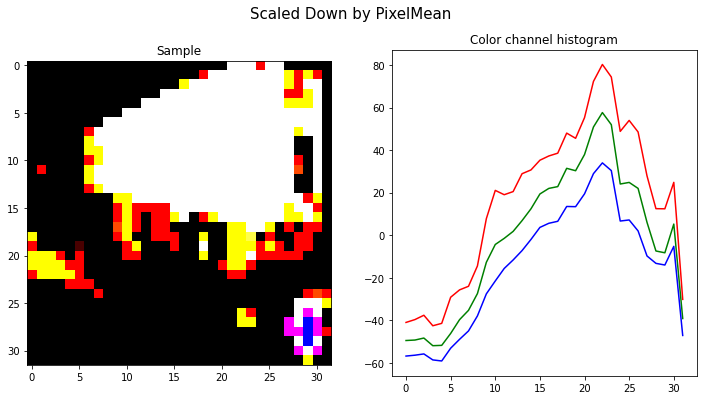

In [75]:
subtracted_mean_sample = sample_img_1 - pixel_mean
plot_img_and_hist(subtracted_mean_sample, "Scaled Down by PixelMean")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


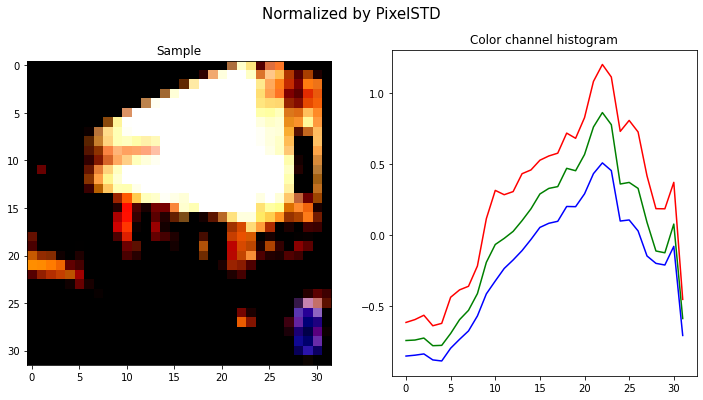

In [71]:
subtracted_mean_sample = (sample_img_1 - pixel_mean) / pixel_std
plot_img_and_hist(subtracted_mean_sample, "Normalized by PixelSTD")

## Comparison using the pixel-wise mean and standard deviation for a stack of images

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


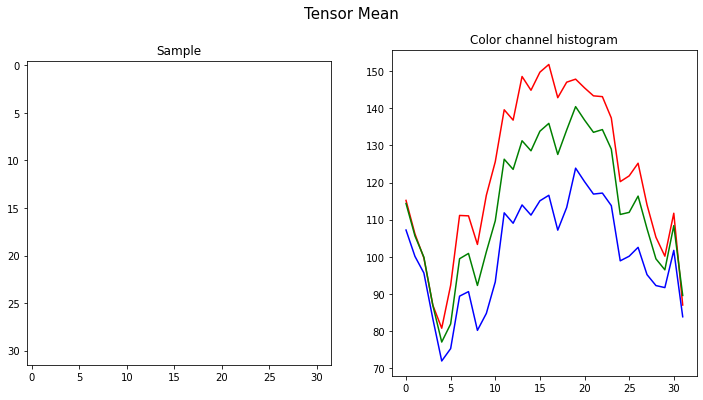

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


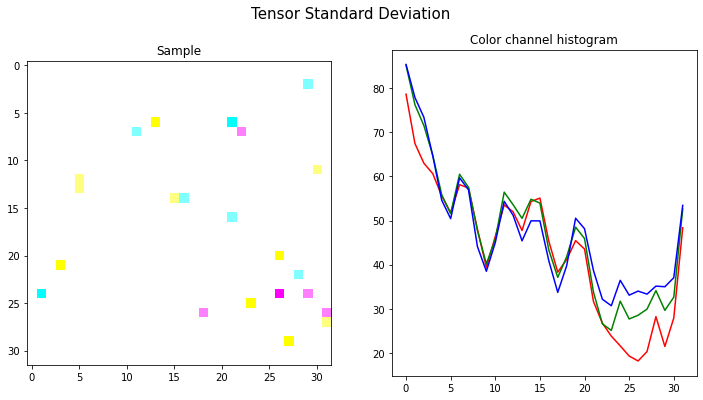

In [72]:
samples_stack = np.stack([sample_img_1, sample_img_2])
pixel_wise_mean = np.mean(samples_stack, axis=0)
pixel_wise_std = np.std(samples_stack, axis=0)
plot_img_and_hist(pixel_wise_mean, "Tensor Mean")
plot_img_and_hist(pixel_wise_std, "Tensor Standard Deviation")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


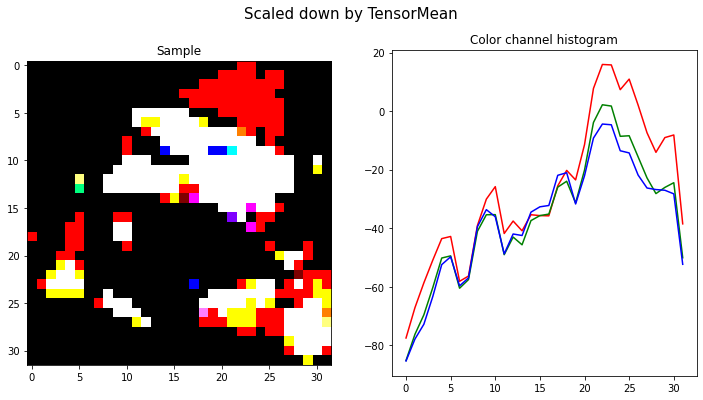

In [73]:
res1 = sample_img_1 - pixel_wise_mean
plot_img_and_hist(res1, "Scaled down by TensorMean")

/tmp/ipykernel_176724/1772947094.py:1: RuntimeWarning: invalid value encountered in true_divide
  res2 = (sample_img_1 - pixel_wise_mean) / pixel_wise_std
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


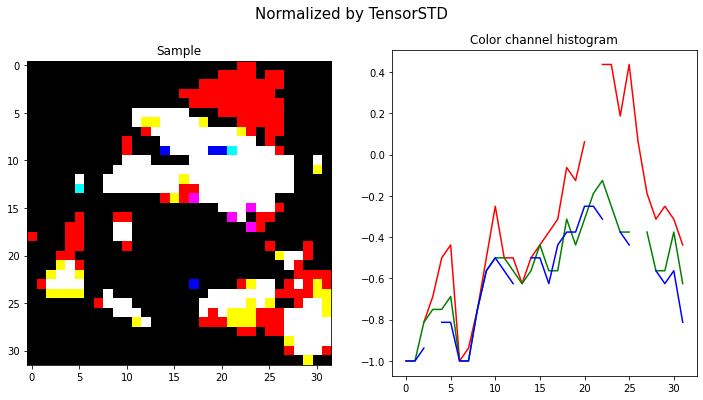

In [74]:
res2 = (sample_img_1 - pixel_wise_mean) / pixel_wise_std
plot_img_and_hist(res2, "Normalized by TensorSTD")

## Rotation

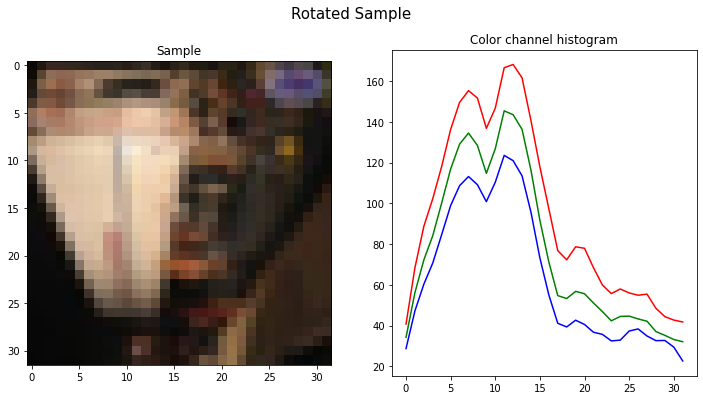

In [77]:
rot_sample_1 = np.rot90(sample_img_1)
plot_img_and_hist(rot_sample_1, "Rotated Sample")